## Objetctive est de prédire le prix d'un Airbnb  

## Importer les bibliotheque 

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as  plt 

import  seaborn as sns 


from  sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

## Importer le dataset

In [78]:
df = pd.read_csv("D:/ProjetPerso/Projet_IA/Projet_IA_prediction/Data/listings_paris.csv")

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,52931,https://www.airbnb.com/rooms/52931,20230904181324,2023-09-06,previous scrape,Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...,I will be delighted to welcome you to my charm...,"In some streets, Les Épinettes has also become...",https://a0.muscache.com/pictures/miso/Hosting-...,50502817,...,4.71,4.24,4.24,7511706944917,t,382,378,4,0,1.65
1,53353,https://www.airbnb.com/rooms/53353,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...,A 100 m2 Loft/apartment (with 20 m2 terrace) o...,NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...,https://a0.muscache.com/pictures/2a1726b5-5a09...,37051412,...,4.91,4.48,4.73,7511800114704,f,1,1,0,0,0.24
2,3109,https://www.airbnb.com/rooms/3109,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.11
3,54377,https://www.airbnb.com/rooms/54377,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...,We love Paris. Giving tourists the opportunity...,The district is cosmopolitan and particularly ...,https://a0.muscache.com/pictures/miso/Hosting-...,247562,...,5.00,4.57,4.88,7511800523290,f,1,0,1,0,1.19
4,5396,https://www.airbnb.com/rooms/5396,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.56 · Studio · 1 bed ...,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.55,7510402838018,f,1,1,0,0,2.05


## Analyser et Traiter le dataset 

In [ ]:
df.columns.to_list()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [ ]:
print("ligne_colonne:" , df.shape , "  ", "size :" , df.size )

ligne_colonne: (67942, 75)    size : 5095650


Analyser les colonnes 

In [ ]:
#Nombre de données manquantes par colonnes

df['reviews_per_month'].isnull().sum()

df.isnull().sum().sum()

df.isnull().sum().sort_values(ascending=False)



calendar_updated                67942
neighbourhood_group_cleansed    67942
bathrooms                       67942
host_about                      37151
host_neighbourhood              34304
                                ...  
maximum_maximum_nights              0
minimum_nights_avg_ntm              0
has_availability                    0
availability_30                     0
id                                  0
Length: 75, dtype: int64

In [ ]:
#Obtenir une liste des colonnes avec des données manquantes

column_valeur_maquantes = df.columns[df.isnull().any()]
column_valeur_maquantes

Index(['description', 'neighborhood_overview', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

In [ ]:
#afficher les colonnes des données maquantes avec leurs valeur 

for column in column_valeur_maquantes :
    print(column , df[column].isnull().sum())


description 526
neighborhood_overview 29911
host_name 7
host_since 7
host_location 12803
host_about 37151
host_response_time 25898
host_response_rate 25898
host_acceptance_rate 22266
host_is_superhost 974
host_thumbnail_url 7
host_picture_url 7
host_neighbourhood 34304
host_listings_count 7
host_total_listings_count 7
host_verifications 7
host_has_profile_pic 7
host_identity_verified 7
neighbourhood 29911
neighbourhood_group_cleansed 67942
bathrooms 67942
bathrooms_text 83
bedrooms 15620
beds 700
calendar_updated 67942
first_review 14757
last_review 14757
review_scores_rating 14757
review_scores_accuracy 15257
review_scores_cleanliness 15255
review_scores_checkin 15267
review_scores_communication 15257
review_scores_location 15267
review_scores_value 15270
license 18570
reviews_per_month 14757


In [ ]:
df.shape

(67942, 75)

Supprimer les colonnes de la dataframe avec plus de 50% de données manquantes en utiliser la fonction pandas drop()

In [ ]:
for column in column_valeur_maquantes : 
    if df[column].isnull().sum() * 100 / df.shape[1] > 50 :
        df.drop(column ,axis=1 , inplace=True)

In [ ]:
df.shape

(67942, 48)

In [ ]:
df.isnull().sum().sort_values(ascending=False)
df.isnull().sum().sum()

63

Analyser les lignes 

In [ ]:
#trouver les lignes avec des données maquantes 
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
67937    0
67938    0
67939    0
67940    0
67941    0
Length: 67942, dtype: int64

In [ ]:
#Obtenir une liste des lignes avec des données manquantes

donne_manquate_ligne =df.index[df.isnull().any(axis=1)]
donne_manquate_ligne

Index([], dtype='int64')

In [ ]:
#Nombre de données manquantes par lignes

df.isnull().sum(axis=1).sort_values(ascending=False)


0        0
45303    0
45289    0
45290    0
45291    0
        ..
22657    0
22658    0
22659    0
22660    0
67941    0
Length: 67935, dtype: int64

Supprimer les lignes avec des données manquantes 

In [ ]:
df.drop(donne_manquate_ligne, axis= 0 , inplace=True)


In [ ]:
df.shape

(67935, 48)

In [ ]:
#les données maquantes
df.isnull().sum().sum()


0

In [ ]:
# voir le type des serie 

df.dtypes


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_thumbnail_url                               object
host_picture_url                                 object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                          

In [81]:
df[['price', 'minimum_nights', 'maximum_nights' , 'neighbourhood_cleansed']].sort_values(by='price' , ascending= False)

 

,price,minimum_nights,maximum_nights,neighbourhood_cleansed
45884,$999.00,1,365,Popincourt
22898,$999.00,1,1125,Batignolles-Monceau
28682,$999.00,5,22,Luxembourg
21188,$999.00,1,1125,Élysée
20919,$999.00,1,1125,Bourse
...,...,...,...,...
59385,"$1,000.00",2,60,Vaugirard
59382,"$1,000.00",2,365,Ménilmontant
31376,"$1,000.00",1,6,Buttes-Montmartre
65115,"$1,000.00",3,30,Entrepôt


In [73]:
df['neighbourhood_cleansed']

0        Batignolles-Monceau
1          Buttes-Montmartre
2               Observatoire
3          Buttes-Montmartre
4             Hôtel-de-Ville
                ...         
67937           Ménilmontant
67938             Popincourt
67939                 Louvre
67940                  Opéra
67941         Hôtel-de-Ville
Name: neighbourhood_cleansed, Length: 67935, dtype: object

<Figure size 1000x700 with 0 Axes>

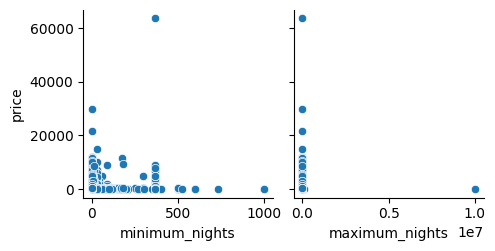

In [69]:
#tracer un graphe pour voir les colonne important 

plt.figure(figsize=(10, 7))

sns.pairplot(df , x_vars=['minimum_nights'	 , 'maximum_nights']  ,y_vars=["price"] )

plt.show()

In [ ]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',


In [ ]:
# 'id' : identifiant
# 'listing_url' : URL de la liste
# 'scrape_id' : identifiant du scraping
# 'last_scraped' : dernière extraction
# 'source' : source
# 'name' : nom
# 'picture_url' : URL de l'image
# 'host_id' : identifiant de l'hôte
# 'host_url' : URL de l'hôte
# 'host_name' : nom de l'hôte
# 'host_since' : depuis quand l'hôte est actif
# 'host_thumbnail_url' : URL de la miniature de l'hôte
# 'host_picture_url' : URL de l'image de l'hôte
# 'host_listings_count' : nombre d'annonces de l'hôte
# 'host_total_listings_count' : nombre total d'annonces de l'hôte
# 'host_verifications' : vérifications de l'hôte
# 'host_has_profile_pic' : l'hôte a-t-il une photo de profil
# 'host_identity_verified' : l'identité de l'hôte a-t-elle été vérifiée
# 'neighbourhood_cleansed' : quartier nettoyé
# 'latitude' : latitude
# 'longitude' : longitude
# 'property_type' : type de propriété
# 'room_type' : type de chambre
# 'accommodates' : nombre de personnes pouvant être accueillies
# 'amenities' : équipements
# 'price' : prix
# 'minimum_nights' : nombre minimum de nuits
# 'maximum_nights' : nombre maximum de nuits
# 'minimum_minimum_nights' : minimum des nuits minimum
# 'maximum_minimum_nights' : maximum des nuits minimum
# 'minimum_maximum_nights' : minimum des nuits maximum
# 'maximum_maximum_nights' : maximum des nuits maximum
# 'minimum_nights_avg_ntm' : moyenne des nuits minimum
# 'maximum_nights_avg_ntm' : moyenne des nuits maximum
# 'has_availability' : disponibilité
# 'availability_30' : disponibilité pour 30 jours
# 'availability_60' : disponibilité pour 60 jours
# 'availability_90' : disponibilité pour 90 jours
# 'availability_365' : disponibilité pour 365 jours
# 'calendar_last_scraped' : calendrier de la dernière extraction
# 'number_of_reviews' : nombre d'avis
# 'number_of_reviews_ltm' : nombre d'avis au cours de la dernière année
# 'number_of_reviews_l30d' : nombre d'avis au cours des 30 derniers jours
# 'instant_bookable' : réservation instantanée
# 'calculated_host_listings_count' : nombre d'annonces calculées par l'hôte
# 'calculated_host_listings_count_entire_homes' : nombre total de logements entiers gérés par l'hôte
# 'calculated_host_listings_count_private_rooms' : nombre total de chambres privées gérées par l'hôte
# 'calculated_host_listings_count_shared_rooms' : nombre total de chambres partagées gérées par l'hôte

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,picture_url,host_id,host_url,host_name,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,prix_reservation
0,52931,https://www.airbnb.com/rooms/52931,20230904181324,2023-09-06,previous scrape,Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...,https://a0.muscache.com/pictures/miso/Hosting-...,50502817,https://www.airbnb.com/users/show/50502817,Pierre De WeHost,...,2023-09-06,17,17,0,t,382,378,4,0,627.0
1,53353,https://www.airbnb.com/rooms/53353,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...,https://a0.muscache.com/pictures/2a1726b5-5a09...,37051412,https://www.airbnb.com/users/show/37051412,Indranil,...,2023-09-05,37,5,1,f,1,1,0,0,594.0
2,3109,https://www.airbnb.com/rooms/3109,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,...,2023-09-05,9,0,0,f,1,1,0,0,220.0
3,54377,https://www.airbnb.com/rooms/54377,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...,https://a0.muscache.com/pictures/miso/Hosting-...,247562,https://www.airbnb.com/users/show/247562,Nicolas,...,2023-09-05,102,27,1,f,1,0,1,0,360.0
4,5396,https://www.airbnb.com/rooms/5396,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.56 · Studio · 1 bed ...,https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,...,2023-09-05,354,44,3,f,1,1,0,0,140.0


In [ ]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_thumbnail_url                               object
host_picture_url                                 object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                          

Modifier les type  des valeurs des colonnes  

In [ ]:
# Supprimer les espaces de la colonne 'price'
df['price'] = df['price'].str.replace(' ', '')

# Supprimer le symbole "$" de la colonne 'price'
df['price'] = df['price'].str.replace('$', '')

# Supprimer les virgules de la colonne 'price'
df['price'] = df['price'].str.replace(',', '')

# Convertir les valeurs de la colonne 'price' en float
df['price'] = df['price'].astype(float)

########################################################################################


Voir les columns qui peut influencer le prix d'un airbnb 

Adapter le LabelEncoder aux données de columns  et remplacer les valeurs par les entiers correspondants

In [ ]:
#Localisation géographique :

label_encoder = LabelEncoder()
# Adapter le LabelEncoder aux données de 'room_type' et remplacer les valeurs par les entiers correspondants
df['neighbourhood_cleansed_encoded']= label_encoder.fit_transform(df['neighbourhood_cleansed'])
# Afficher les premières lignes pour vérifier les modifications
print(df[['neighbourhood_cleansed_encoded' , 'neighbourhood_cleansed']])

####################################################################################

#Type de propriété et de chambre :

label_encoder = LabelEncoder()
# Adapter le LabelEncoder aux données de 'property_type' et remplacer les valeurs par les entiers correspondants
df['property_type_encoded'] = label_encoder.fit_transform(df['property_type'])
# Afficher les premières lignes pour vérifier les modifications
print(df[['property_type', 'property_type_encoded']])


label_encoder = LabelEncoder()
# Adapter le LabelEncoder aux données de 'room_type' et remplacer les valeurs par les entiers correspondants
df['room_type_encoded']= label_encoder.fit_transform(df['room_type'])
# Afficher les premières lignes pour vérifier les modifications
print(df[['room_type_encoded' , 'room_type']]) 

####################################################################################


#Capacité d'accueil : 




####################################################################################

#Équipements

label_encoder = LabelEncoder()

# Adapter le LabelEncoder aux données de 'room_type' et remplacer les valeurs par les entiers correspondants
df['amenities_encoded']= label_encoder.fit_transform(df['amenities'])


# Afficher les premières lignes pour vérifier les modifications
print(df[['amenities_encoded' , 'amenities']])

####################################################################################

#Nombre de commentaires et d'avis : number_of_reviews, number_of_reviews_ltm et number_of_reviews_l30d


####################################################################################

#Nombre de nuits minimum  : minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights et maximum_maximum_nights 


####################################################################################

#Nombre de commentaires et d'avis :  Les variables number_of_reviews, number_of_reviews_ltm et number_of_reviews_l30d



####################################################################################

#Réservation instantanée : instant_bookable

#Équipements

label_encoder = LabelEncoder()

# Adapter le LabelEncoder aux données de 'room_type' et remplacer les valeurs par les entiers correspondants
df['instant_bookable_encoded']= label_encoder.fit_transform(df['instant_bookable'])


# Afficher les premières lignes pour vérifier les modifications
print(df[['instant_bookable_encoded' , 'instant_bookable']])


####################################################################################

#Nombre de listes d'hôtes : host_listings_count, host_total_listings_count, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms et calculated_host_listings_count_shared_rooms peuvent également influencer le prix, car elles peuvent refléter l'expérience ou la taille de l'entreprise de l'hôte.



####################################################################################


       neighbourhood_cleansed_encoded neighbourhood_cleansed
0                                   0    Batignolles-Monceau
1                                   3      Buttes-Montmartre
2                                  10           Observatoire
3                                   3      Buttes-Montmartre
4                                   6         Hôtel-de-Ville
...                               ...                    ...
67937                               9           Ménilmontant
67938                              15             Popincourt
67939                               7                 Louvre
67940                              11                  Opéra
67941                               6         Hôtel-de-Ville

[67935 rows x 2 columns]
                     property_type  property_type_encoded
0               Entire rental unit                     16
1               Entire rental unit                     16
2               Entire rental unit                     16
3      Pri

Matrice de corrélation :

Matrice de corrélation : Vous pouvez créer une matrice de corrélation pour visualiser les relations entre chaque paire de variables de X ainsi que leur relation avec la variable cible Y (prix). Cela vous aidera à identifier les variables les plus corrélées avec le prix et à comprendre les relations entre les différentes caractéristiques.

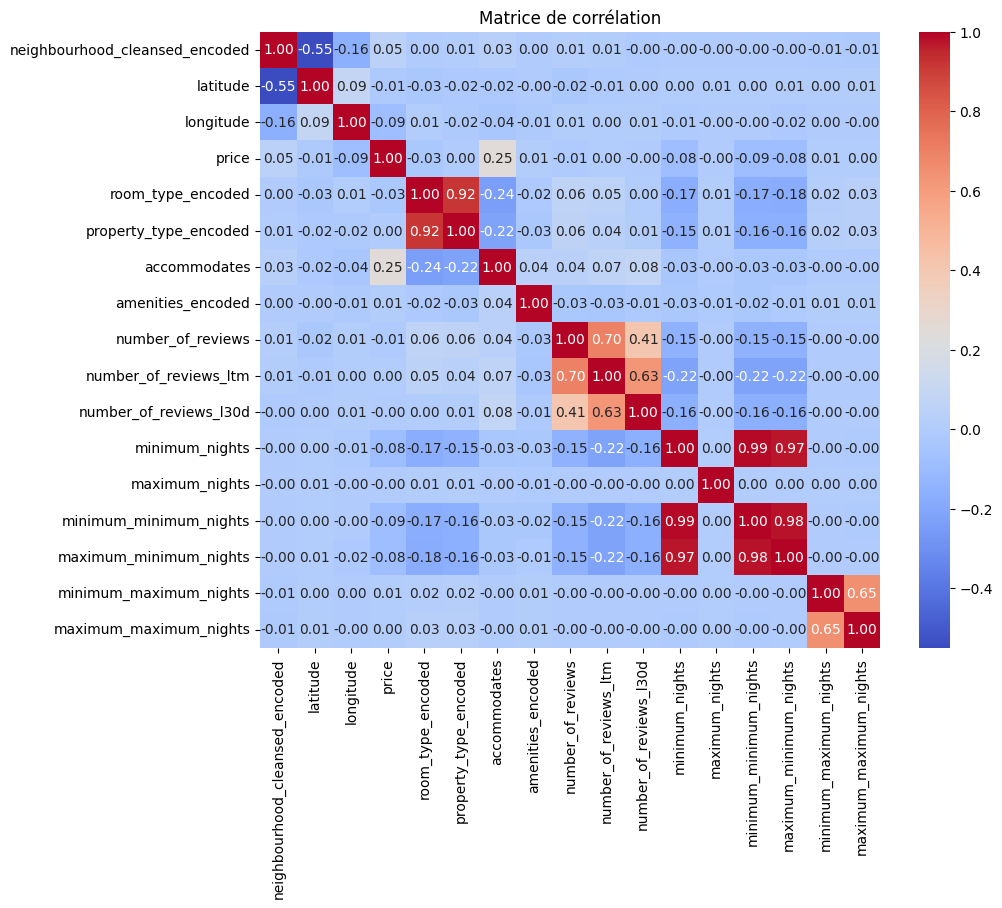

In [ ]:
X_corrélation  = df[['neighbourhood_cleansed_encoded', 'latitude' , 'longitude' , 'price', 'room_type_encoded' , 'property_type_encoded', 'accommodates' ,
         'amenities_encoded', 'number_of_reviews', 'number_of_reviews_ltm' , 'number_of_reviews_l30d', 'minimum_nights', 'maximum_nights', 
         'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights' , 'maximum_maximum_nights' ]]

# Créer une matrice de corrélation
correlation_matrix = X_corrélation.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

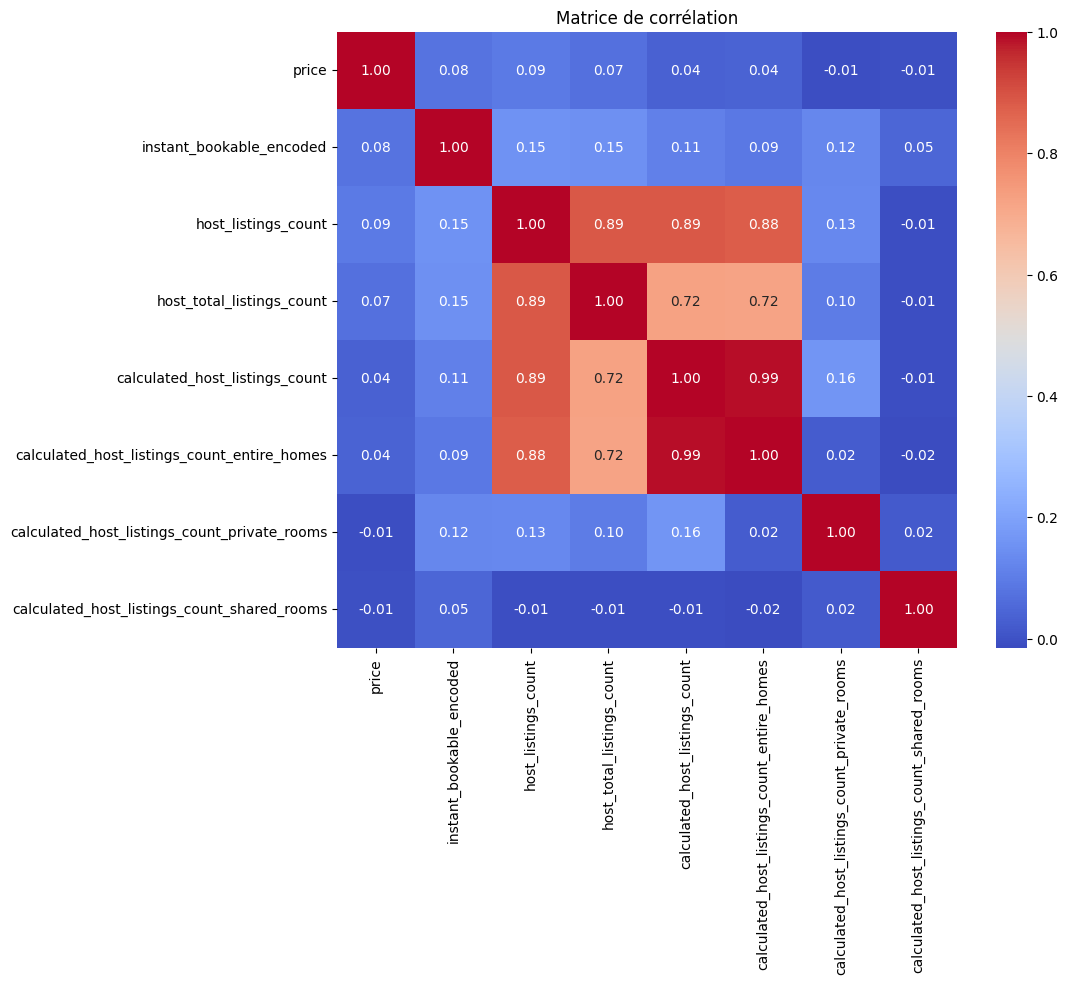

In [ ]:
X_corrélation_1  = df[['price' , 'instant_bookable_encoded', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms' , 'calculated_host_listings_count_shared_rooms']]

# Créer une matrice de corrélation
correlation_matrix = X_corrélation_1.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

Prediction : régréssion  lineaire simple  et multiple : variable cible et variable explicative y=f(x) ou y=f(x1,x2,x2)


In [ ]:
#choisir les variables explicative et la variable cible 

X  = df[['property_type_encoded', 'accommodates' ,
         'amenities_encoded',  'number_of_reviews_ltm' , 'number_of_reviews_l30d', 'minimum_nights', 'maximum_nights', 
         'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights' , 'maximum_maximum_nights' , 
         'instant_bookable_encoded', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes']]

Y = df['price']

In [ ]:
print(X.dtypes , Y.dtypes)

property_type_encoded                            int32
accommodates                                     int64
amenities_encoded                                int32
number_of_reviews_ltm                            int64
number_of_reviews_l30d                           int64
minimum_nights                                   int64
maximum_nights                                   int64
minimum_minimum_nights                           int64
maximum_minimum_nights                           int64
minimum_maximum_nights                           int64
maximum_maximum_nights                           int64
instant_bookable_encoded                         int32
host_listings_count                            float64
host_total_listings_count                      float64
calculated_host_listings_count                   int64
calculated_host_listings_count_entire_homes      int64
dtype: object float64


In [ ]:
# Vérifier les dimensions de X et Y
print("Shape of X:", X.shape  ,  "   ","Shape of Y:", Y.shape)

Shape of X: (67935, 16)     Shape of Y: (67935,)


Visualisations géographiques : Si les variables latitude et longitude sont incluses, vous pouvez les utiliser pour créer des cartes pour visualiser la répartition géographique des prix.

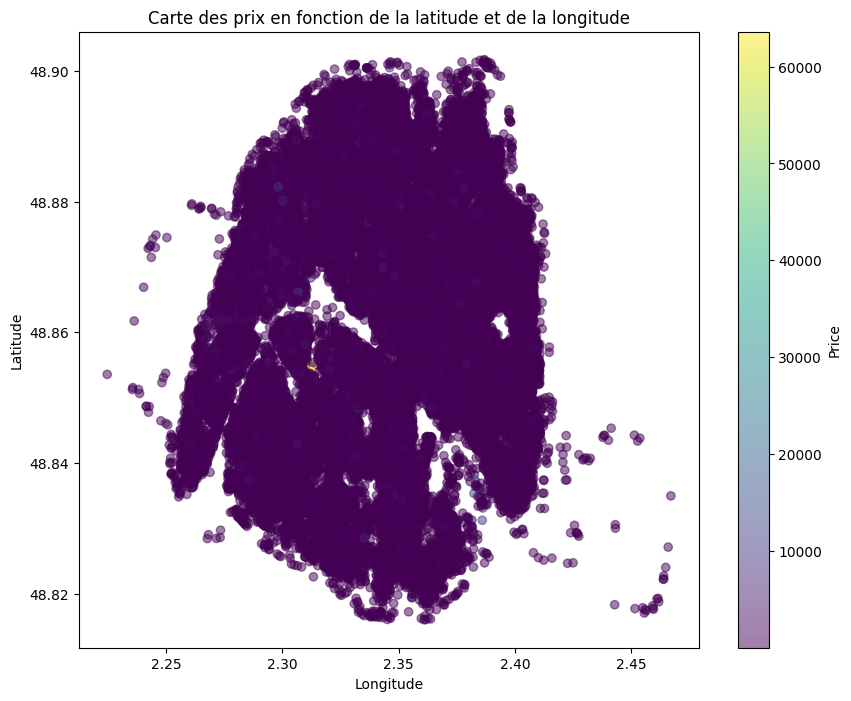

In [ ]:
# Tracer une carte des prix en fonction de la latitude et de la longitude
plt.figure(figsize=(10, 8))
plt.scatter(X_corrélation['longitude'], X_corrélation['latitude'], c=Y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Carte des prix en fonction de la latitude et de la longitude')
plt.show()

Créer un model de regression lineaire 

In [ ]:
#choisir les variables explicative et la variable cible 

X  = df[['neighbourhood_cleansed_encoded', 'latitude' , 'longitude' , 'room_type_encoded' , 'property_type_encoded', 'accommodates' ,
         'amenities_encoded', 'number_of_reviews', 'number_of_reviews_ltm' , 'number_of_reviews_l30d', 'minimum_nights', 'maximum_nights', 
         'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights' , 'maximum_maximum_nights' , 
         'instant_bookable_encoded', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms' , 'calculated_host_listings_count_shared_rooms' ]]

Y = df['price']

KeyError: "['neighbourhood_cleansed_encoded', 'room_type_encoded', 'property_type_encoded', 'amenities_encoded', 'instant_bookable_encoded'] not in index"

In [ ]:
# plt.scatter( X['latitude'], Y)
# plt.scatter( X['longitude'], Y)
# plt.scatter( X['property_type_encoded'], Y)
# plt.scatter( X['room_type_encoded'], Y)
#plt.scatter( X['accommodates'], Y)
# plt.scatter( X['amenities_encoded'], Y)
# plt.scatter( X['minimum_nights'], Y)
# plt.scatter( X['maximum_nights'], Y)
#plt.scatter( X['number_of_reviews'], Y)

In [ ]:
#creer un modele de regression lineaire 
model = LinearRegression()

model 

LinearRegression()

In [ ]:
#e modèle utilise les données d'entrée X et les étiquettes de sortie Y pour apprendre les relations entre les caractéristiques et les étiquettes. 
model.fit(X, Y)

LinearRegression()

In [ ]:
#afficher le resultat :  le coefficient de détermination (R²)
Coef_dét = model.score(X, Y)

print("Coefficient de détermination " , Coef_dét)

Coefficient de détermination  0.09960774794169502


In [ ]:
print("ordonnée a l'origne" , model.intercept_)  
print("pente" , model.coef_)


ordonnée a l'origne -22554.24773054037
pente [ 2.97122519e+00  5.03332800e+02 -9.33859844e+02 -6.59032970e+01
  7.13216289e+00  7.34885220e+01  1.23591345e-05 -1.58903401e-01
 -1.17437406e-01 -7.44712916e+00 -1.06033110e-01 -5.49171914e-06
 -3.94474968e-01  2.19069257e-01  2.20363185e-07 -1.76453211e-08
  2.96851145e+01  2.17386288e+00 -4.61368538e-01  6.91048935e+00
 -8.82140593e+00 -8.86432979e+00 -2.61807531e+01]


In [ ]:
Y_préd = model.predict(X)

print('prédiction' , Y_préd , sep='\n')


prédiction
[417.27862315 401.75999217 147.48668144 ... 602.97382048 616.89571382
 427.38240629]


In [ ]:
# #visualiser l'eccard des valeur prédic et réel

# plt.scatter(X , Y)
# plt.plot(X , Y_préd)
# plt.show()